In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.metrics import make_scorer

In [92]:
data = np.loadtxt('../Data/features.csv',delimiter=',',skiprows=1)

In [98]:
cycle_life = data[:,0]
DeltaQ_logVar = data[:,1]
DeltaQ_Min = np.log10(-data[:, 2])
DeltaQ_Skew = data[:, 3]
DeltaQ_Kurt = data[:, 4]
QD_Max_2 = data[:, 5]
QD_2 = data[:, 6]
slope_capacity_fade_2_100 = data[:, 7]
intercept_capacity_fade_2_100 = data[:, 8]
slope_capacity_fade_91_100 = data[:, 9]
intercept_capacity_91_100 = data[:, 10]
init_avg_charge_time = data[:, 11]
avg_T = data[:, 12]
min_IR = data[:, 13]
IR_100_2 = data[:, 14]

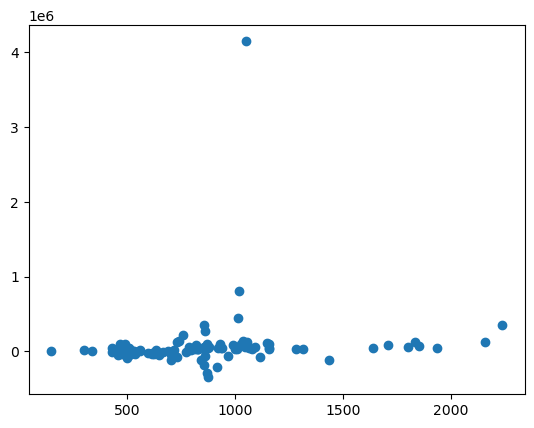

In [100]:
plt.scatter(cycle_life, test)

In [74]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122])

In [81]:
x_train = data[train_ind,-1]
y_train = data[train_ind,0]
y_train = np.log10(y_train) #tried with np.log10 as well

scaler = preprocessing.StandardScaler().fit(x_train.reshape(-1, 1))
x_train = scaler.transform(x_train.reshape(-1, 1))

x_test = data[test_ind,-1]
y_test = data[test_ind,0]
y_test = np.log10(y_test)
x_test = scaler.transform(x_test.reshape(-1, 1))

x_stest = data[secondary_ind,-1]
y_stest = data[secondary_ind,0]
y_stest = np.log10(y_stest)
x_stest = scaler.transform(x_stest.reshape(-1, 1))


In [82]:
regressor = SVR()
def loss(ground_truth, predictions):
    diff = np.sqrt(np.mean((10**ground_truth - 10**predictions)**2))
    return diff

my_scorer = make_scorer(loss, greater_is_better=False)

param_grid = {'C': np.logspace(-6, 1, base=10, num=1000),
              'kernel': ['rbf', 'linear'],
              'gamma': np.logspace(-6, 1.5, base=10, num=1000),  #changed from -5,1
              'epsilon': np.logspace(-6, 1, base=10, num=1000)} #changed from #-5,1
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 5000, cv=folds, param_distributions = param_grid ,scoring=my_scorer, random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train.reshape(-1,1),y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=5000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-06, 1.01626509e-06, 1.03279473e-06, 1.04959323e-06,
       1.06666496e-06, 1.08401436e-06, 1.10164595e-06, 1.11956432e-06,
       1.13777413e-06, 1.15628013e-06, 1.17508713e-06, 1.19420003e-06,
       1.21362380e-06, 1.23336350e-06, 1...
       2.43998630e+01, 2.48253223e+01, 2.52582003e+01, 2.56986263e+01,
       2.61467321e+01, 2.66026515e+01

[CV] END C=0.8201889499202212, epsilon=1.5530705739334586e-05, gamma=10.280447320933098, kernel=rbf; total time=   0.0s
[CV] END C=0.8201889499202212, epsilon=1.5530705739334586e-05, gamma=10.280447320933098, kernel=rbf; total time=   0.0s
[CV] END C=0.7814350607844542, epsilon=2.496878428884327, gamma=0.016566059589499152, kernel=linear; total time=   0.0s
[CV] END C=0.7814350607844542, epsilon=2.496878428884327, gamma=0.016566059589499152, kernel=linear; total time=   0.0s
[CV] END C=0.7814350607844542, epsilon=2.496878428884327, gamma=0.016566059589499152, kernel=linear; total time=   0.0s
[CV] END C=0.7814350607844542, epsilon=2.496878428884327, gamma=0.016566059589499152, kernel=linear; total time=   0.0s
[CV] END C=1.288576213185518, epsilon=4.271993966306777e-06, gamma=0.005575017644697695, kernel=linear; total time=   0.0s
[CV] END C=1.288576213185518, epsilon=4.271993966306777e-06, gamma=0.005575017644697695, kernel=linear; total time=   0.0s
[CV] END C=1.288576213185518, epsi

[CV] END C=1.656605958949915e-05, epsilon=0.00011669898186171475, gamma=0.0009077326525210223, kernel=rbf; total time=   0.0s
[CV] END C=6.9317172761554005e-06, epsilon=7.671581176779303e-05, gamma=6.789406812696113, kernel=rbf; total time=   0.0s
[CV] END C=6.9317172761554005e-06, epsilon=7.671581176779303e-05, gamma=6.789406812696113, kernel=rbf; total time=   0.0s
[CV] END C=4.41209286319119e-06, epsilon=0.06306665540567406, gamma=4.04209583979631e-05, kernel=rbf; total time=   0.0s
[CV] END C=4.41209286319119e-06, epsilon=0.06306665540567406, gamma=4.04209583979631e-05, kernel=rbf; total time=   0.0s
[CV] END C=4.41209286319119e-06, epsilon=0.06306665540567406, gamma=4.04209583979631e-05, kernel=rbf; total time=   0.0s
[CV] END C=4.41209286319119e-06, epsilon=0.06306665540567406, gamma=4.04209583979631e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.07060717714137765, epsilon=5.594325706169378, gamma=0.3296233873153629, kernel=rbf; total time=   0.0s
[CV] END C=0.07060717714137765

[CV] END C=7.42798248256491e-05, epsilon=0.09593608287093147, gamma=3.1296480106707505e-06, kernel=linear; total time=   0.0s
[CV] END C=0.002801866556459195, epsilon=0.022456979955397718, gamma=0.0033191052252582428, kernel=linear; total time=   0.0s
[CV] END C=0.002801866556459195, epsilon=0.022456979955397718, gamma=0.0033191052252582428, kernel=linear; total time=   0.0s
[CV] END C=0.002801866556459195, epsilon=0.022456979955397718, gamma=0.0033191052252582428, kernel=linear; total time=   0.0s
[CV] END C=1.795784647002097e-05, epsilon=0.03585539857459817, gamma=1.0495932305582267e-05, kernel=linear; total time=   0.0s
[CV] END C=1.795784647002097e-05, epsilon=0.03585539857459817, gamma=1.0495932305582267e-05, kernel=linear; total time=   0.0s
[CV] END C=1.795784647002097e-05, epsilon=0.03585539857459817, gamma=1.0495932305582267e-05, kernel=linear; total time=   0.0s
[CV] END C=1.795784647002097e-05, epsilon=0.03585539857459817, gamma=1.0495932305582267e-05, kernel=linear; total t

[CV] END C=0.0029886528735503827, epsilon=6.820776732865692e-06, gamma=0.014677992676220705, kernel=rbf; total time=   0.0s
[CV] END C=0.0029886528735503827, epsilon=6.820776732865692e-06, gamma=0.014677992676220705, kernel=rbf; total time=   0.0s
[CV] END C=0.0029886528735503827, epsilon=6.820776732865692e-06, gamma=0.014677992676220705, kernel=rbf; total time=   0.0s
[CV] END C=0.0295440799888038, epsilon=0.007376797602527731, gamma=9.794696670695386e-06, kernel=rbf; total time=   0.0s
[CV] END C=0.0295440799888038, epsilon=0.007376797602527731, gamma=9.794696670695386e-06, kernel=rbf; total time=   0.0s
[CV] END C=0.0295440799888038, epsilon=0.007376797602527731, gamma=9.794696670695386e-06, kernel=rbf; total time=   0.0s
[CV] END C=0.0295440799888038, epsilon=0.007376797602527731, gamma=9.794696670695386e-06, kernel=rbf; total time=   0.0s
[CV] END C=0.0007832382599179197, epsilon=0.01679674872092653, gamma=8.500205580918159e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.00078323

[CV] END C=2.47967289250216e-05, epsilon=0.02860595535175745, gamma=0.00020884295030496015, kernel=rbf; total time=   0.0s
[CV] END C=2.47967289250216e-05, epsilon=0.02860595535175745, gamma=0.00020884295030496015, kernel=rbf; total time=   0.0s
[CV] END C=2.47967289250216e-05, epsilon=0.02860595535175745, gamma=0.00020884295030496015, kernel=rbf; total time=   0.0s
[CV] END C=2.47967289250216e-05, epsilon=0.02860595535175745, gamma=0.00020884295030496015, kernel=rbf; total time=   0.0s
[CV] END C=3.1296480106707505, epsilon=5.871766390733249, gamma=13.323693225669961, kernel=linear; total time=   0.0s
[CV] END C=3.1296480106707505, epsilon=5.871766390733249, gamma=13.323693225669961, kernel=linear; total time=   0.0s
[CV] END C=3.1296480106707505, epsilon=5.871766390733249, gamma=13.323693225669961, kernel=linear; total time=   0.0s
[CV] END C=3.1296480106707505, epsilon=5.871766390733249, gamma=13.323693225669961, kernel=linear; total time=   0.0s
[CV] END C=3.4240061379714256e-05, e

[CV] END C=7.42798248256491e-05, epsilon=3.895745615775501e-05, gamma=0.042867892418314346, kernel=linear; total time=   0.0s
[CV] END C=0.0019023011886689439, epsilon=0.07531420165974376, gamma=0.06955724020492732, kernel=linear; total time=   0.0s
[CV] END C=0.0019023011886689439, epsilon=0.07531420165974376, gamma=0.06955724020492732, kernel=linear; total time=   0.0s
[CV] END C=0.0019023011886689439, epsilon=0.07531420165974376, gamma=0.06955724020492732, kernel=linear; total time=   0.0s
[CV] END C=0.0019023011886689439, epsilon=0.07531420165974376, gamma=0.06955724020492732, kernel=linear; total time=   0.0s
[CV] END C=7.359814475265771, epsilon=1.0375666787451848e-05, gamma=6.907793387861822e-05, kernel=rbf; total time=   0.0s
[CV] END C=7.359814475265771, epsilon=1.0375666787451848e-05, gamma=6.907793387861822e-05, kernel=rbf; total time=   0.0s
[CV] END C=7.359814475265771, epsilon=1.0375666787451848e-05, gamma=6.907793387861822e-05, kernel=rbf; total time=   0.0s
[CV] END C=7

[CV] END C=3.833395101766605e-05, epsilon=0.031009266359319297, gamma=0.0028904200487788745, kernel=rbf; total time=   0.0s
[CV] END C=3.833395101766605e-05, epsilon=0.031009266359319297, gamma=0.0028904200487788745, kernel=rbf; total time=   0.0s
[CV] END C=0.0035690493456752297, epsilon=0.04871780218794631, gamma=0.0027443433032283654, kernel=rbf; total time=   0.0s
[CV] END C=0.0035690493456752297, epsilon=0.04871780218794631, gamma=0.0027443433032283654, kernel=rbf; total time=   0.0s
[CV] END C=0.0035690493456752297, epsilon=0.04871780218794631, gamma=0.0027443433032283654, kernel=rbf; total time=   0.0s
[CV] END C=0.0035690493456752297, epsilon=0.04871780218794631, gamma=0.0027443433032283654, kernel=rbf; total time=   0.0s
[CV] END C=0.23300614106969247, epsilon=3.408258547423452e-06, gamma=7.15079543716245e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.23300614106969247, epsilon=3.408258547423452e-06, gamma=7.15079543716245e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.233

[CV] END C=0.36606951475968985, epsilon=0.29680586086656024, gamma=0.00010280447320933097, kernel=linear; total time=   0.0s
[CV] END C=0.36606951475968985, epsilon=0.29680586086656024, gamma=0.00010280447320933097, kernel=linear; total time=   0.0s
[CV] END C=2.066880249629082e-06, epsilon=0.05366976945540476, gamma=0.28213076759394706, kernel=linear; total time=   0.0s
[CV] END C=2.066880249629082e-06, epsilon=0.05366976945540476, gamma=0.28213076759394706, kernel=linear; total time=   0.0s
[CV] END C=2.066880249629082e-06, epsilon=0.05366976945540476, gamma=0.28213076759394706, kernel=linear; total time=   0.0s
[CV] END C=2.066880249629082e-06, epsilon=0.05366976945540476, gamma=0.28213076759394706, kernel=linear; total time=   0.0s
[CV] END C=1e-06, epsilon=0.003746050032748993, gamma=3.785106277781153e-06, kernel=rbf; total time=   0.0s
[CV] END C=1e-06, epsilon=0.003746050032748993, gamma=3.785106277781153e-06, kernel=rbf; total time=   0.0s
[CV] END C=1e-06, epsilon=0.0037460500

[CV] END C=0.0026694784940343207, epsilon=0.0038689007393279753, gamma=1.955650715865947, kernel=rbf; total time=   0.0s
[CV] END C=0.0026694784940343207, epsilon=0.0038689007393279753, gamma=1.955650715865947, kernel=rbf; total time=   0.0s
[CV] END C=0.0026694784940343207, epsilon=0.0038689007393279753, gamma=1.955650715865947, kernel=rbf; total time=   0.0s
[CV] END C=0.0026694784940343207, epsilon=0.0038689007393279753, gamma=1.955650715865947, kernel=rbf; total time=   0.0s
[CV] END C=0.00029749075472144406, epsilon=3.6776091016010306, gamma=9.140310748756223e-06, kernel=linear; total time=   0.0s
[CV] END C=0.00029749075472144406, epsilon=3.6776091016010306, gamma=9.140310748756223e-06, kernel=linear; total time=   0.0s
[CV] END C=0.00029749075472144406, epsilon=3.6776091016010306, gamma=9.140310748756223e-06, kernel=linear; total time=   0.0s
[CV] END C=0.00029749075472144406, epsilon=3.6776091016010306, gamma=9.140310748756223e-06, kernel=linear; total time=   0.0s
[CV] END C=4

[CV] END C=0.22560740664968593, epsilon=0.001355601785329369, gamma=1.0902787247818346e-06, kernel=rbf; total time=   0.0s
[CV] END C=1.6758078645307687e-06, epsilon=0.013186214013947485, gamma=0.0015783314056521166, kernel=rbf; total time=   0.0s
[CV] END C=0.6036438506075864, epsilon=3.4636941773717343e-06, gamma=5.441714286865887e-06, kernel=linear; total time=   0.0s
[CV] END C=0.6036438506075864, epsilon=3.4636941773717343e-06, gamma=5.441714286865887e-06, kernel=linear; total time=   0.0s
[CV] END C=0.6036438506075864, epsilon=3.4636941773717343e-06, gamma=5.441714286865887e-06, kernel=linear; total time=   0.0s
[CV] END C=0.6036438506075864, epsilon=3.4636941773717343e-06, gamma=5.441714286865887e-06, kernel=linear; total time=   0.0s
[CV] END C=0.1607704421673822, epsilon=0.11092898648952228, gamma=0.0002525820026962785, kernel=linear; total time=   0.0s
[CV] END C=0.1607704421673822, epsilon=0.11092898648952228, gamma=0.0002525820026962785, kernel=linear; total time=   0.0s
[C

[CV] END C=0.10233165783302449, epsilon=8.107909806731678, gamma=0.6248788072006888, kernel=rbf; total time=   0.0s
[CV] END C=0.0024231727942375983, epsilon=0.0042621588290153245, gamma=7.662745193945354e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.0024231727942375983, epsilon=0.0042621588290153245, gamma=7.662745193945354e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.0024231727942375983, epsilon=0.0042621588290153245, gamma=7.662745193945354e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.0009505565920101192, epsilon=0.0007583677914997191, gamma=0.0018761746914391214, kernel=linear; total time=   0.0s
[CV] END C=0.0009505565920101192, epsilon=0.0007583677914997191, gamma=0.0018761746914391214, kernel=linear; total time=   0.0s
[CV] END C=0.0009505565920101192, epsilon=0.0007583677914997191, gamma=0.0018761746914391214, kernel=linear; total time=   0.0s
[CV] END C=0.0009505565920101192, epsilon=0.0007583677914997191, gamma=0.0018761746914391214, kernel=linear; total time=   0.

[CV] END C=0.011589483034398117, epsilon=0.0002927294835042816, gamma=0.005771135368040321, kernel=linear; total time=   0.0s
[CV] END C=0.011589483034398117, epsilon=0.0002927294835042816, gamma=0.005771135368040321, kernel=linear; total time=   0.0s
[CV] END C=0.011589483034398117, epsilon=0.0002927294835042816, gamma=0.005771135368040321, kernel=linear; total time=   0.0s
[CV] END C=0.0034004119327037063, epsilon=0.1483102514336103, gamma=0.019023011886689457, kernel=rbf; total time=   0.0s
[CV] END C=0.0034004119327037063, epsilon=0.1483102514336103, gamma=0.019023011886689457, kernel=rbf; total time=   0.0s
[CV] END C=0.0034004119327037063, epsilon=0.1483102514336103, gamma=0.019023011886689457, kernel=rbf; total time=   0.0s
[CV] END C=0.0034004119327037063, epsilon=0.1483102514336103, gamma=0.019023011886689457, kernel=rbf; total time=   0.0s
[CV] END C=0.09440064789417603, epsilon=1.0890229622637305e-05, gamma=1.7327612960490418e-05, kernel=rbf; total time=   0.0s
[CV] END C=0.

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=SVR(), n_iter=5000, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-06, 1.01626509e-06, 1.03279473e-06, 1.04959323e-06,
       1.06666496e-06, 1.08401436e-06, 1.10164595e-06, 1.11956432e-06,
       1.13777413e-06, 1.15628013e-06, 1.17508713e-06, 1.19420003e-06,
       1.21362380e-06, 1.23336350e-06, 1...
       2.43998630e+01, 2.48253223e+01, 2.52582003e+01, 2.56986263e+01,
       2.61467321e+01, 2.66026515e+01, 2.70665207e+01, 2.75384784e+01,
       2.80186656e+01, 2.85072258e+01, 2.90043049e+01, 2.95100517e+01,
       3.00246171e+01, 3.05481550e+01, 3.10808217e+01, 3.16227766e+01]),
                                        'kernel': ['rbf', 'linear']},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

2346, epsilon=0.003806979871402284, gamma=0.00020526377527092522, kernel=rbf; total time=   0.0s
[CV] END C=0.007996554525892346, epsilon=0.003806979871402284, gamma=0.00020526377527092522, kernel=rbf; total time=   0.0s
[CV] END C=0.007996554525892346, epsilon=0.003806979871402284, gamma=0.00020526377527092522, kernel=rbf; total time=   0.0s
[CV] END C=6.963744730628222e-05, epsilon=6.263207452198692, gamma=1.4327029534098295e-05, kernel=linear; total time=   0.0s
[CV] END C=6.963744730628222e-05, epsilon=6.263207452198692, gamma=1.4327029534098295e-05, kernel=linear; total time=   0.0s
[CV] END C=6.963744730628222e-05, epsilon=6.263207452198692, gamma=1.4327029534098295e-05, kernel=linear; total time=   0.0s
[CV] END C=6.963744730628222e-05, epsilon=6.263207452198692, gamma=1.4327029534098295e-05, kernel=linear; total time=   0.0s
[CV] END C=0.0006665363268124914, epsilon=0.0005317723177850972, gamma=0.0026056490194759753, kernel=rbf; total time=   0.0s

In [83]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -264.91682158363176
Best hyperparameters:  {'kernel': 'rbf', 'gamma': 2.169383518385182, 'epsilon': 0.0002119953457536071, 'C': 0.04951020159556351}


In [84]:
regressor = SVR(kernel='rbf',epsilon=model.best_params_['epsilon'], gamma = model.best_params_['gamma'], C=model.best_params_['C'] )
regressor.fit(x_train.reshape(-1,1),y_train)

SVR(C=0.04951020159556351, epsilon=0.0002119953457536071,
    gamma=2.169383518385182)

In [85]:
print("RMSE on Train Data: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_train.reshape(-1,1)))-
                                               np.power(10,y_train))**2) )) # 1 is the best score

RMSE on Train Data:  292.8296778927506


In [86]:
print("RMSE on Primary Test: ", 
      np.sqrt(np.mean((np.power(10,regressor.predict(x_test.reshape(-1,1)))-np.power(10,y_test))**2) ))

RMSE on Primary Test:  355.4144460035451


In [87]:
print("RMSE on Secondary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_stest.reshape(-1,1)))-
                                                   np.power(10,y_stest))**2) ))

RMSE on Secondary Test:  446.92109664082255
